In [1]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
%matplotlib inline

In [2]:
def ballisticODE(time, state, initial_state, gravity, drag, drag_is_quadratic):
    x = state[0]
    y = state[1]
    xV = state[2]
    yV = state[3]
    
    x_dot = xV
    y_dot = yV
    
    if drag_is_quadratic:
        xV_dot = -drag * xV**2
        yV_dot = -gravity - drag*yV**2
    else:
        xV_dot = -drag * xV
        yV_dot = -gravity - drag*yV
        
    state_dot = np.array([x_dot, y_dot, xV_dot, yV_dot])
    
    # if it hits the ground
    if x > initial_state[0] and y <= 0:
        state_dot *= 0
    
    return state_dot

In [27]:
def get_trajectory(position, launch_angle, launch_velocity, gravity, drag_coefficient, drag_is_quadratic):
    initial_state = [position[0],
                     position[1], 
                     launch_velocity*np.cos(launch_angle*np.pi/180), 
                     launch_velocity*np.sin(launch_angle*np.pi/180)]

    solved = scipy.integrate.solve_ivp(ballisticODE, (0, time_to_stop), initial_state, args=(initial_state, gravity, drag_coefficient, drag_is_quadratic), t_eval = times_to_save)
    
    return (solved.y[0], solved.y[1])

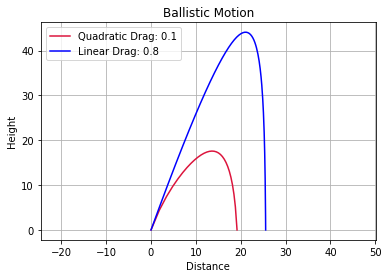

In [36]:
time_to_stop = 50 #seconds
times_to_save = np.linspace(0, time_to_stop, 500)

x, y = get_trajectory((0, 0), 70, 60, 9.8, 0.1, True)

x2, y2 = get_trajectory((0,0), 70, 60, 9.8, 0.8, False)

plt.title("Ballistic Motion")
plt.xlabel("Distance")
plt.ylabel("Height")
plt.xlim(left = -5)
plt.ylim(bottom = -5)
plt.grid(True)
plt.axis('equal')
plt.plot(x, y, color="crimson", label="Quadratic Drag: 0.1")
plt.plot(x2, y2, color='blue', label="Linear Drag: 0.8")
plt.legend()
plt.show()